In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
match =pd.read_csv(r"C:\Users\Hp\Downloads\archive (1)\Matches.csv")
ball = pd.read_csv(r"C:\Users\Hp\Downloads\archive (1)\Ball.csv")

In [3]:
match.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


In [4]:
ball.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
match.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
match.shape

(816, 17)

In [8]:
ball.shape

(193468, 18)

In [9]:
match.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [14]:
print('Match plyed so far:',match.shape[0])
print('\nCities played at :',match['city'].unique())
print('\n Teams patricipated:',match['team1'].unique())

Match plyed so far: 816

Cities played at : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams patricipated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [16]:
match['season'] = pd.DatetimeIndex(match['date']).year
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [18]:
match_per_season = match.groupby(['season'])['id'].count().reset_index().rename(columns={'id':"matches"})
match_per_season 

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Matches played in each season ')

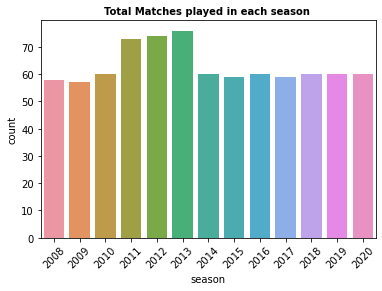

In [27]:
sns.countplot(match['season'])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('season',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.title('Total Matches played in each season ',fontsize=10, fontweight = "bold")

In [35]:
season_data = match[['id','season']].merge(ball, left_on = 'id',right_on='id',how='left').drop('id',axis=1)
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


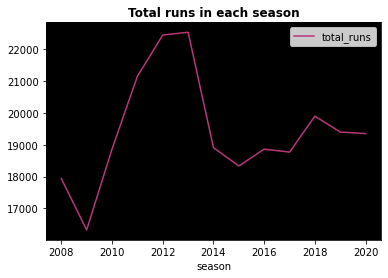

In [46]:
Season = season_data.groupby(['season'])['total_runs'].sum().reset_index()
p = Season.set_index('season')
ax= plt.axes()
ax.set(facecolor = "black")
sns.lineplot(data=p,palette ="magma")
plt.title('Total runs in each season',fontsize =12, fontweight="bold")
plt.show()

In [51]:
runs_per_season = pd.concat([match_per_season, Season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']= runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('season',inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


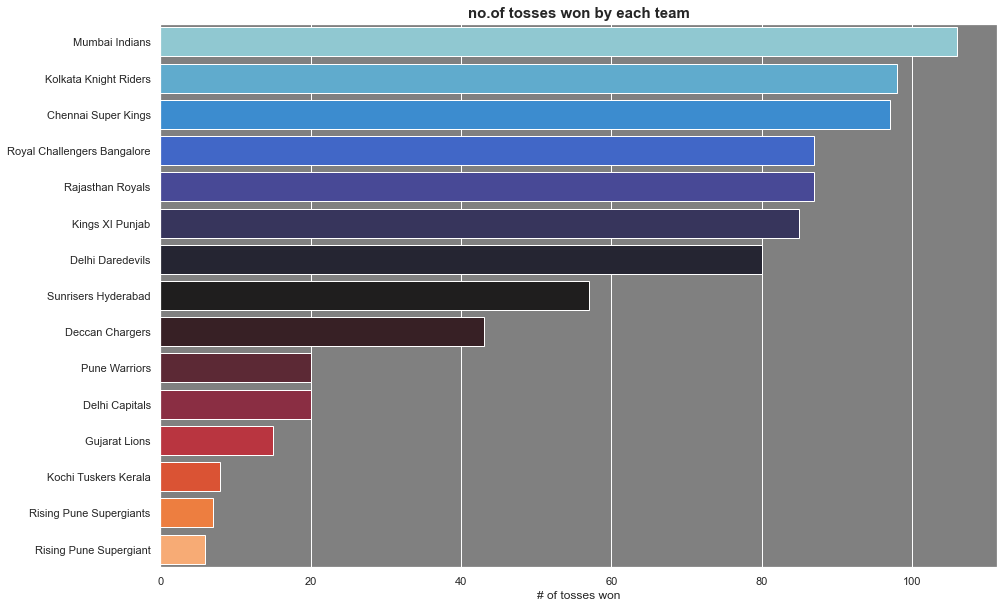

In [60]:
toss =match['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor='grey')
sns.set(rc={'figure.figsize':(15,30)},style='darkgrid')
ax.set_title('no.of tosses won by each team',fontsize=15,fontweight="bold")
sns.barplot(y=toss.index,x=toss, orient= 'h',palette= "icefire",saturation=1)
plt.xlabel('# of tosses won')
plt.show()

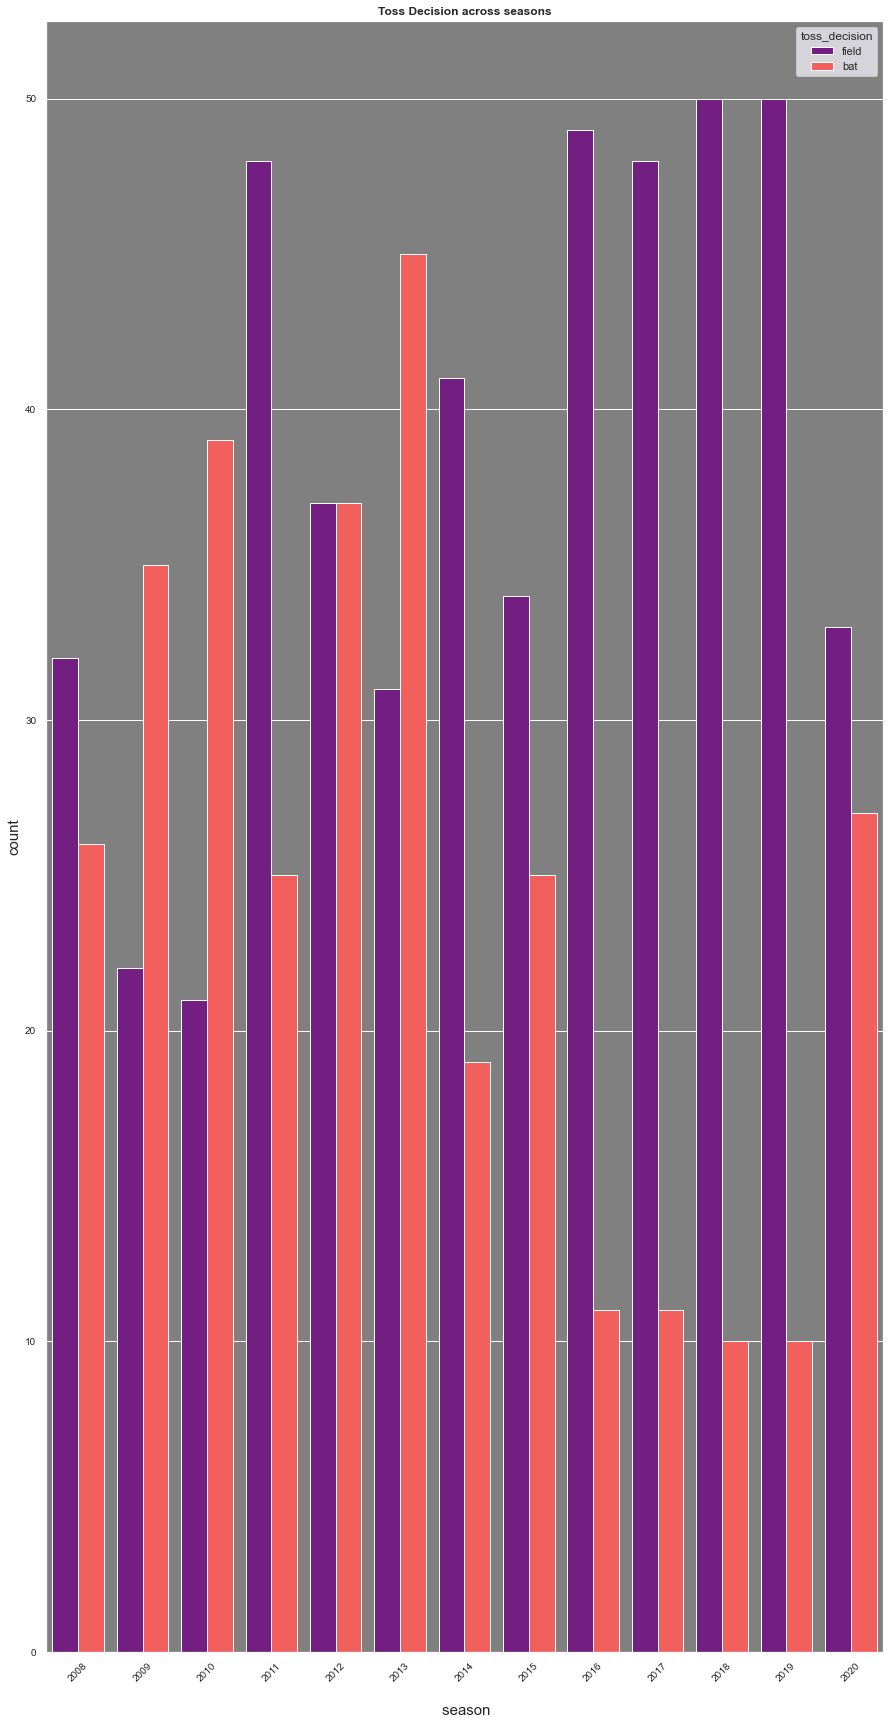

In [69]:
ax= plt.axes()
ax.set(facecolor="grey")
sns.countplot(x='season', hue='toss_decision', data= match, palette="magma",saturation=1)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n season',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title("Toss Decision across seasons",fontsize=12,fontweight="bold")
plt.show()

In [70]:
match['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [72]:
match.venue[match.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [73]:
match.venue[match.result!='wickets'].mode()

0    Feroz Shah Kotla
dtype: object

In [77]:
match.venue[match.toss_winner=='Kings XI Punjab'][match.winner=='Kings XI Punjab'].mode()

0    Punjab Cricket Association Stadium, Mohali
dtype: object

In [78]:
match.venue[match.toss_winner=='Mumbai Indians'][match.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
dtype: object

In [79]:
match.winner[match.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [80]:
match.winner[match.result!='wickets'].mode()

0    Mumbai Indians
dtype: object

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


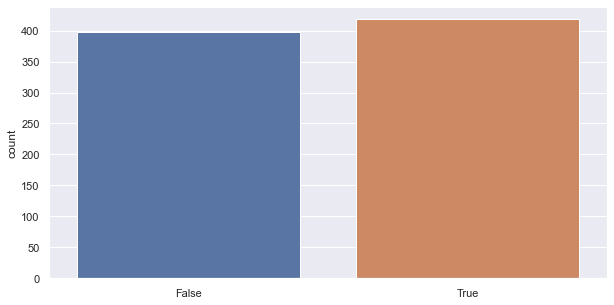

In [82]:
toss = match['toss_winner']==match['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


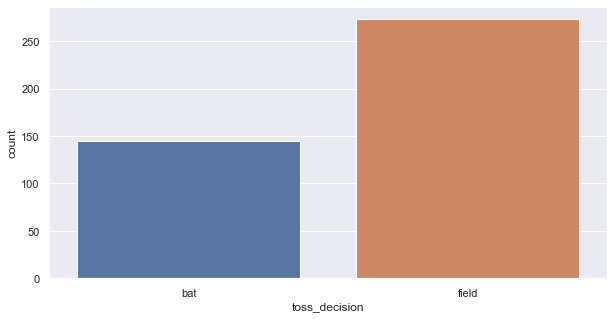

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(match.toss_decision[match.toss_winner==match.winner])
plt.show()

In [88]:
player=(ball['batsman']=='SK Raina')
df_raina= ball[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


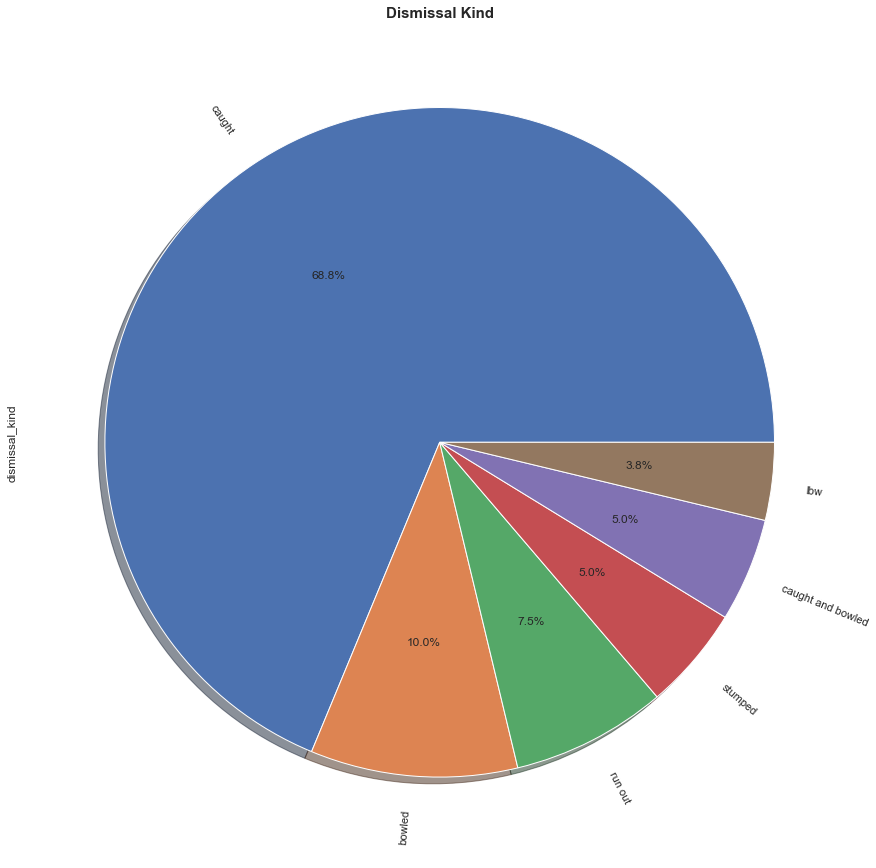

In [89]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title('Dismissal Kind',fontweight="bold", fontsize=15)
plt.show()

In [90]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs


In [92]:
print("Runs scored from 1's: ",count(df_raina,1))
print("Runs scored from 2's: ",count(df_raina,2))
print("Runs scored from 3's: ",count(df_raina,3))
print("Runs scored from 4's: ",count(df_raina,4))
print("Runs scored from 6's: ",count(df_raina,6))

Runs scored from 1's:  1666
Runs scored from 2's:  528
Runs scored from 3's:  33
Runs scored from 4's:  1972
Runs scored from 6's:  1164


In [93]:
match[match['result_margin']==match['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [98]:
runs = ball.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman','runs']
y = runs.sort_values(by='runs',ascending =False).head(10).reset_index().drop('index',axis=1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

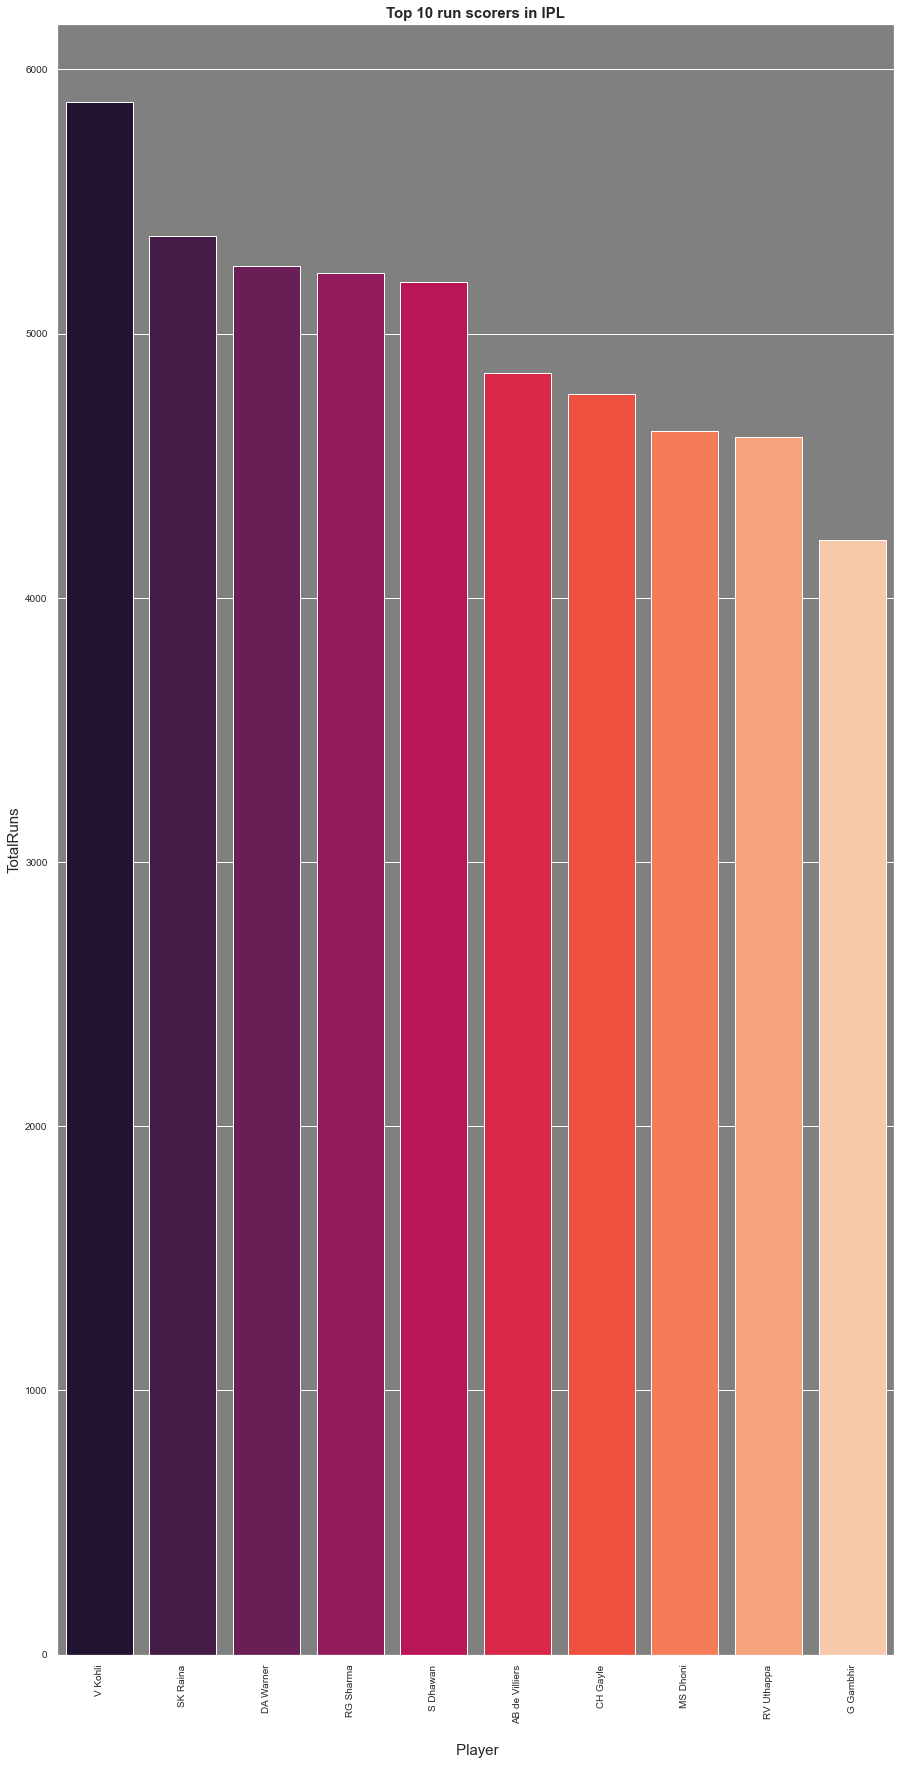

In [99]:
ax= plt.axes()
ax.set(facecolor="grey")
sns.barplot(x=y['Batsman'],y=y['runs'],palette ='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player',fontsize=15)
plt.ylabel('TotalRuns',fontsize=15)
plt.title('Top 10 run scorers in IPL', fontsize=15,fontweight="bold")

Text(0.5, 1.0, 'Hightest MOM award winners')

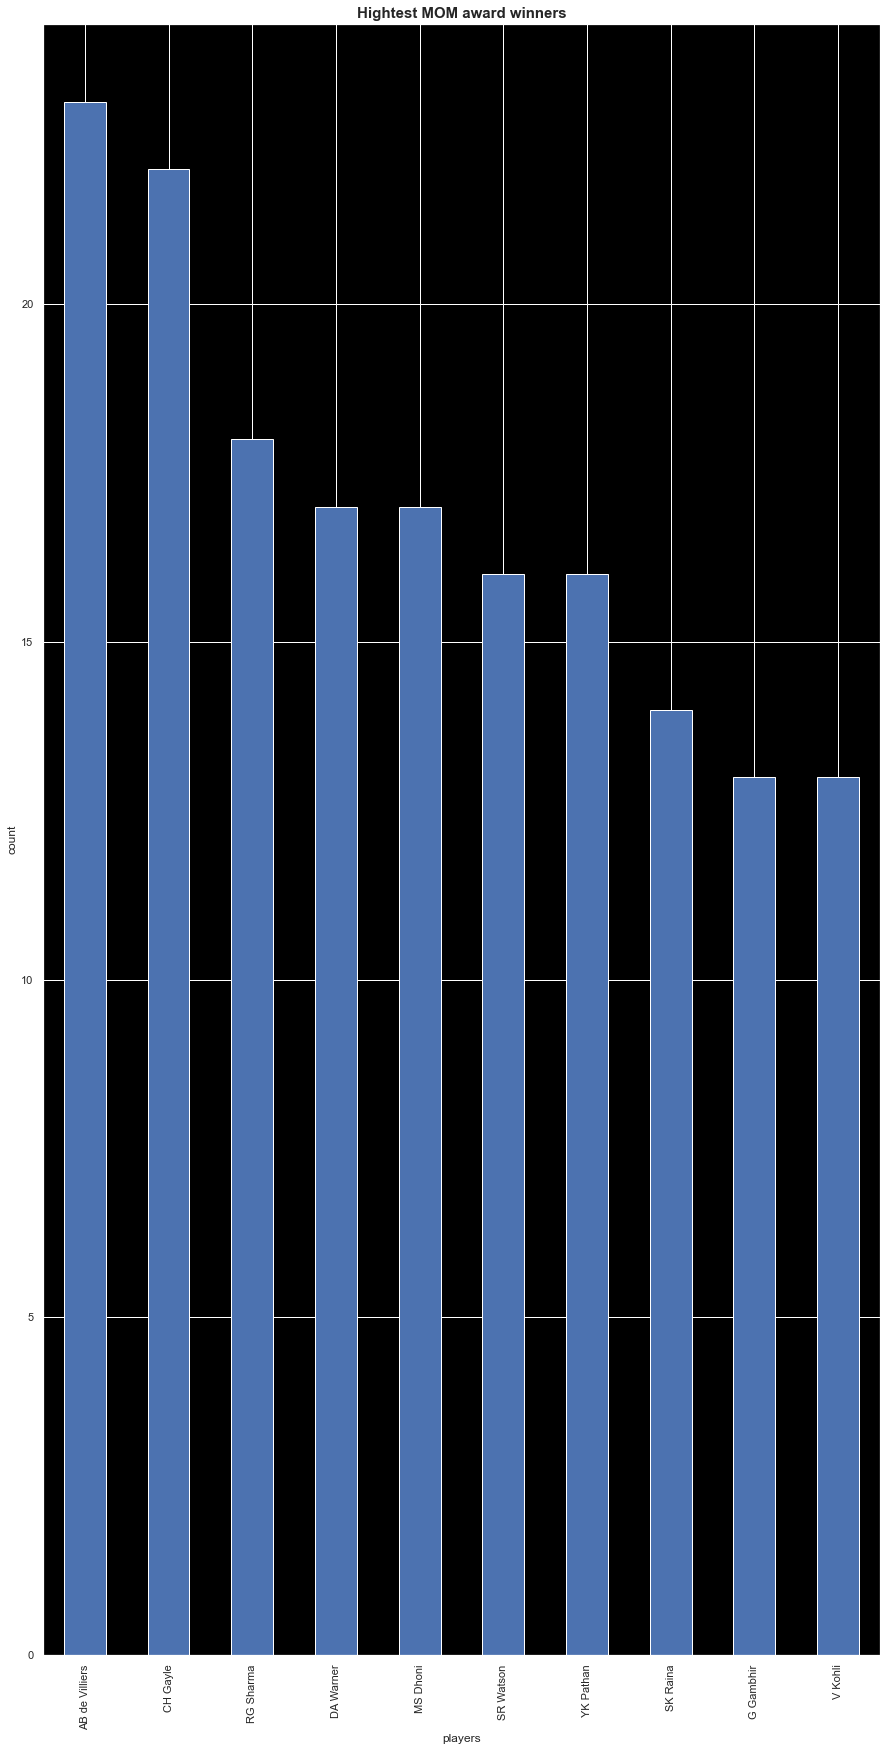

In [105]:
ax= plt.axes()
ax.set(facecolor="black")
match.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('players')
plt.ylabel("count")
plt.title("Hightest MOM award winners",fontsize=15,fontweight="bold")